# ``solarposition.py`` tutorial

This tutorial needs your help to make it better!

Table of contents:
1. [Setup](#Setup)
2. [SPA output](#SPA-output)
2. [Speed tests](#Speed-tests)

This tutorial has been tested against the following package versions:
* pvlib 0.3.0
* Python 3.5.1
* IPython 4.1
* Pandas 0.18.0

It should work with other Python and Pandas versions. It requires pvlib > 0.3.0 and IPython > 3.0.

Authors:
* Will Holmgren (@wholmgren), University of Arizona. July 2014, July 2015, March 2016

## Setup

In [1]:
import datetime

# scientific python add-ons
import numpy as np
import pandas as pd

# plotting stuff
# first line makes the plots appear in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
# seaborn makes your plots look better
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# finally, we import the pvlib library
import pvlib

In [2]:
import pvlib
from pvlib.location import Location

## SPA output

In [3]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
print(tus)
golden = Location(39.742476, -105.1786, 'America/Denver', 1830, 'Golden')
print(golden)
golden_mst = Location(39.742476, -105.1786, 'MST', 1830, 'Golden MST')
print(golden_mst)
berlin = Location(52.5167, 13.3833, 'Europe/Berlin', 34, 'Berlin')
print(berlin)

Tucson: latitude=32.2, longitude=-111, tz=US/Arizona, altitude=700
Golden: latitude=39.742476, longitude=-105.1786, tz=America/Denver, altitude=1830
Golden MST: latitude=39.742476, longitude=-105.1786, tz=MST, altitude=1830
Berlin: latitude=52.5167, longitude=13.3833, tz=Europe/Berlin, altitude=34


In [4]:
times = pd.date_range(start=datetime.datetime(2014,6,23), end=datetime.datetime(2014,6,24), freq='1Min')
times_loc = times.tz_localize(tus.pytz)

In [5]:
times

DatetimeIndex(['2014-06-23 00:00:00', '2014-06-23 00:01:00',
               '2014-06-23 00:02:00', '2014-06-23 00:03:00',
               '2014-06-23 00:04:00', '2014-06-23 00:05:00',
               '2014-06-23 00:06:00', '2014-06-23 00:07:00',
               '2014-06-23 00:08:00', '2014-06-23 00:09:00',
               ...
               '2014-06-23 23:51:00', '2014-06-23 23:52:00',
               '2014-06-23 23:53:00', '2014-06-23 23:54:00',
               '2014-06-23 23:55:00', '2014-06-23 23:56:00',
               '2014-06-23 23:57:00', '2014-06-23 23:58:00',
               '2014-06-23 23:59:00', '2014-06-24 00:00:00'],
              dtype='datetime64[ns]', length=1441, freq='T')

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00-07:00          -34.028887        352.757414 -34.028887   
2014-06-23 00:01:00-07:00          -34.055060        353.032425 -34.055060   
2014-06-23 00:02:00-07:00          -34.080223        353.307627 -34.080223   
2014-06-23 00:03:00-07:00          -34.104374        353.583047 -34.104374   
2014-06-23 00:04:00-07:00          -34.127518        353.858659 -34.127518   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00-07:00  352.757414       124.028887  124.028887  
2014-06-23 00:01:00-07:00  353.032425       124.055060  124.055060  
2014-06-23 00:02:00-07:00  353.307627       124.080223  124.080223  
2014-06-23 00:03:00-07:00  353.583047       124.104374  124.104374  
2014-06-23 00:04:00-07:00  353.858659       124.127518  124.127518  
spa
                           apparent_elevation  apparent_zenith     azimuth  \
2014-06-23 00:00:00-07:00  

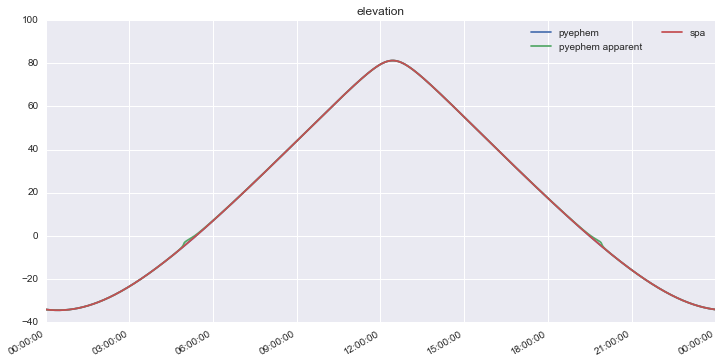

In [6]:
pyephemout = pvlib.solarposition.pyephem(times_loc, tus.latitude, tus.longitude)
spaout = pvlib.solarposition.spa_python(times_loc, tus.latitude, tus.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
spaout['elevation'].plot(label='spa')
plt.legend(ncol=2)
plt.title('elevation')

print('pyephem')
print(pyephemout.head())
print('spa')
print(spaout.head())

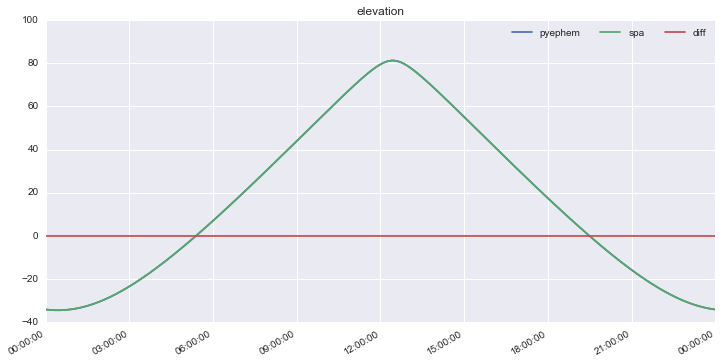

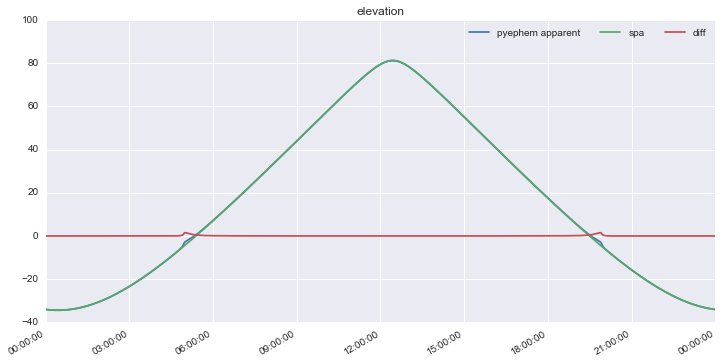

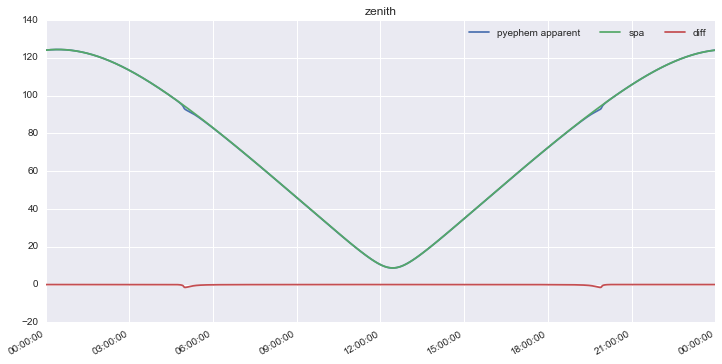

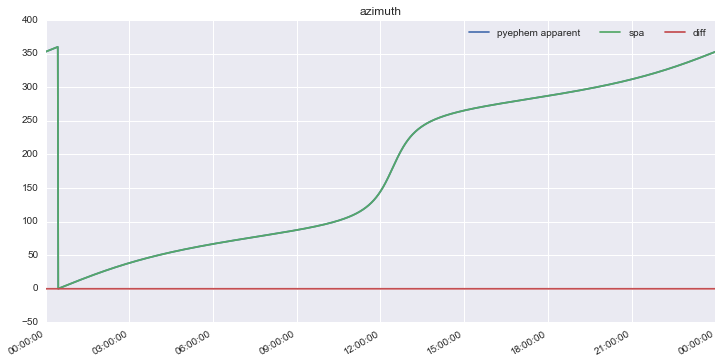

In [7]:
plt.figure()
pyephemout['elevation'].plot(label='pyephem')
spaout['elevation'].plot(label='spa')
(pyephemout['elevation'] - spaout['elevation']).plot(label='diff')
plt.legend(ncol=3)
plt.title('elevation')

plt.figure()
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
spaout['elevation'].plot(label='spa')
(pyephemout['apparent_elevation'] - spaout['elevation']).plot(label='diff')
plt.legend(ncol=3)
plt.title('elevation')

plt.figure()
pyephemout['apparent_zenith'].plot(label='pyephem apparent')
spaout['zenith'].plot(label='spa')
(pyephemout['apparent_zenith'] - spaout['zenith']).plot(label='diff')
plt.legend(ncol=3)
plt.title('zenith')

plt.figure()
pyephemout['apparent_azimuth'].plot(label='pyephem apparent')
spaout['azimuth'].plot(label='spa')
(pyephemout['apparent_azimuth'] - spaout['azimuth']).plot(label='diff')
plt.legend(ncol=3)
plt.title('azimuth')

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00-06:00          -25.154820        344.064195 -25.154820   
2014-06-23 00:01:00-06:00          -25.207201        344.310956 -25.207201   
2014-06-23 00:02:00-06:00          -25.258784        344.558018 -25.258784   
2014-06-23 00:03:00-06:00          -25.309568        344.805380 -25.309568   
2014-06-23 00:04:00-06:00          -25.359550        345.053043 -25.359550   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00-06:00  344.064195       115.154820  115.154820  
2014-06-23 00:01:00-06:00  344.310956       115.207201  115.207201  
2014-06-23 00:02:00-06:00  344.558018       115.258784  115.258784  
2014-06-23 00:03:00-06:00  344.805380       115.309568  115.309568  
2014-06-23 00:04:00-06:00  345.053043       115.359550  115.359550  
spa
                           apparent_elevation  apparent_zenith     azimuth  \
2014-06-23 00:00:00-06:00  

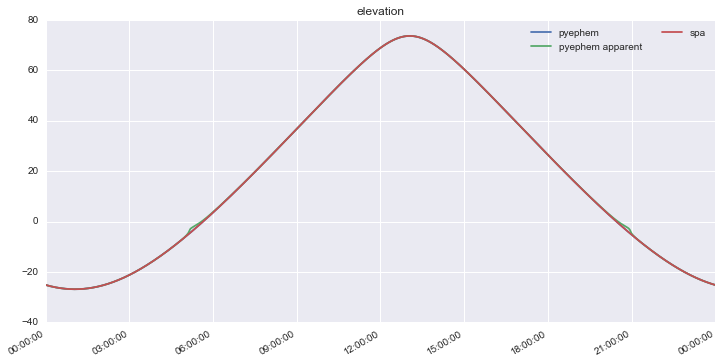

In [8]:
pyephemout = pvlib.solarposition.pyephem(times.tz_localize(golden.tz), golden.latitude, golden.longitude)
spaout = pvlib.solarposition.spa_python(times.tz_localize(golden.tz), golden.latitude, golden.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
spaout['elevation'].plot(label='spa')
plt.legend(ncol=2)
plt.title('elevation')

print('pyephem')
print(pyephemout.head())
print('spa')
print(spaout.head())

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00-06:00          -25.154820        344.064195 -25.154820   
2014-06-23 00:01:00-06:00          -25.207201        344.310956 -25.207201   
2014-06-23 00:02:00-06:00          -25.258784        344.558018 -25.258784   
2014-06-23 00:03:00-06:00          -25.309568        344.805380 -25.309568   
2014-06-23 00:04:00-06:00          -25.359550        345.053043 -25.359550   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00-06:00  344.064195       115.154820  115.154820  
2014-06-23 00:01:00-06:00  344.310956       115.207201  115.207201  
2014-06-23 00:02:00-06:00  344.558018       115.258784  115.258784  
2014-06-23 00:03:00-06:00  344.805380       115.309568  115.309568  
2014-06-23 00:04:00-06:00  345.053043       115.359550  115.359550  
ephem
                           apparent_elevation  elevation     azimuth  \
2014-06-23 00:00:00-06:00      

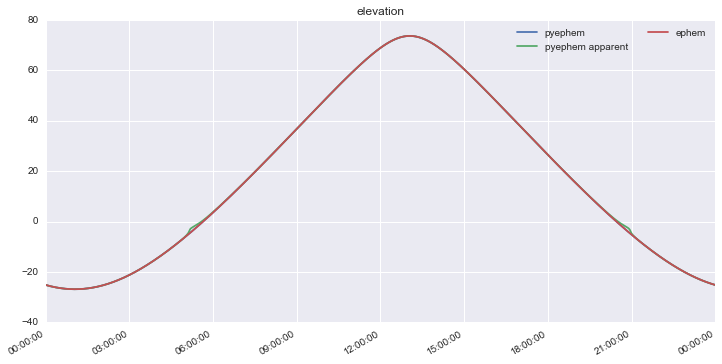

In [9]:
pyephemout = pvlib.solarposition.pyephem(times.tz_localize(golden.tz), golden.latitude, golden.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(golden.tz), golden.latitude, golden.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('elevation')

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00+02:00          -12.598822        343.918876 -12.598822   
2014-06-23 00:01:00+02:00          -12.640668        344.149982 -12.640668   
2014-06-23 00:02:00+02:00          -12.681923        344.381225 -12.681923   
2014-06-23 00:03:00+02:00          -12.722587        344.612605 -12.722587   
2014-06-23 00:04:00+02:00          -12.762658        344.844121 -12.762658   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00+02:00  343.918876       102.598822  102.598822  
2014-06-23 00:01:00+02:00  344.149982       102.640668  102.640668  
2014-06-23 00:02:00+02:00  344.381225       102.681923  102.681923  
2014-06-23 00:03:00+02:00  344.612605       102.722587  102.722587  
2014-06-23 00:04:00+02:00  344.844121       102.762658  102.762658  
ephem
                           apparent_elevation  elevation     azimuth  \
2014-06-23 00:00:00+02:00      

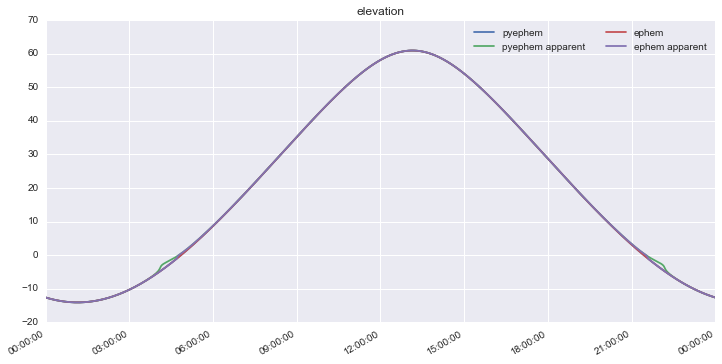

In [10]:
loc = berlin

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
ephemout['apparent_elevation'].plot(label='ephem apparent')
plt.legend(ncol=2)
plt.title('elevation')

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

(-10, 10)

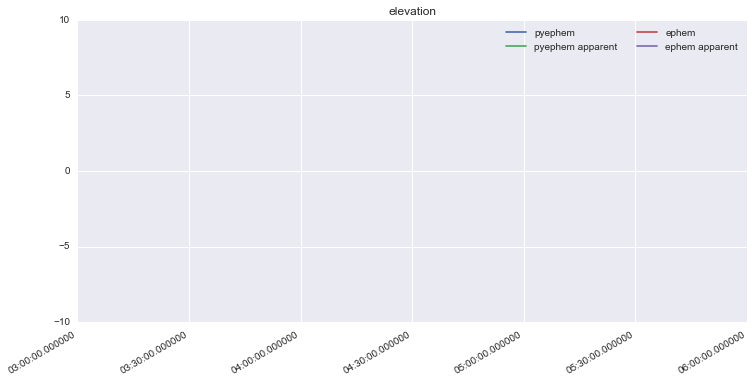

In [11]:
pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
ephemout['apparent_elevation'].plot(label='ephem apparent')
plt.legend(ncol=2)
plt.title('elevation')
plt.xlim(pd.Timestamp('2015-06-28 03:00:00+02:00'), pd.Timestamp('2015-06-28 06:00:00+02:00'))
plt.ylim(-10,10)

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2015-03-28 00:00:00+01:00          -34.669825        356.421155 -34.669825   
2015-03-28 00:05:00+01:00          -34.705895        357.939260 -34.705895   
2015-03-28 00:10:00+01:00          -34.721813        359.458321 -34.721813   
2015-03-28 00:15:00+01:00          -34.717561          0.977630 -34.717561   
2015-03-28 00:20:00+01:00          -34.693143          2.496380 -34.693143   

                              azimuth  apparent_zenith      zenith  
2015-03-28 00:00:00+01:00  356.421155       124.669825  124.669825  
2015-03-28 00:05:00+01:00  357.939260       124.705895  124.705895  
2015-03-28 00:10:00+01:00  359.458321       124.721813  124.721813  
2015-03-28 00:15:00+01:00    0.977630       124.717561  124.717561  
2015-03-28 00:20:00+01:00    2.496380       124.693143  124.693143  
ephem
                           apparent_elevation  elevation     azimuth  \
2015-03-28 00:00:00+01:00      

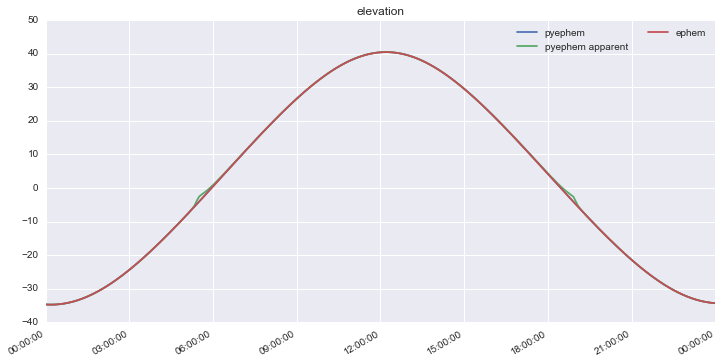

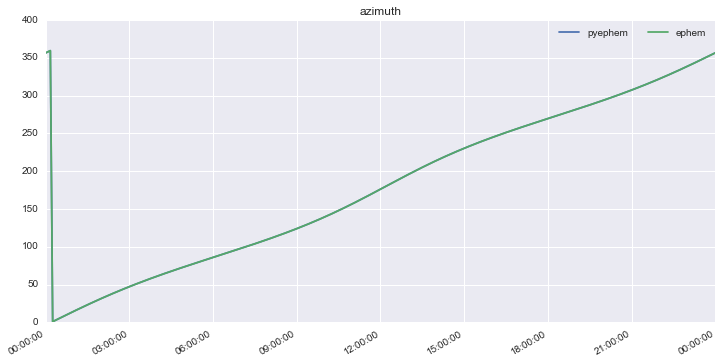

In [12]:
loc = berlin
times = pd.DatetimeIndex(start=datetime.date(2015,3,28), end=datetime.date(2015,3,29), freq='5min')

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('elevation')

plt.figure()
pyephemout['azimuth'].plot(label='pyephem')
ephemout['azimuth'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('azimuth')

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2015-03-30 00:00:00+02:00          -31.976429        338.920871 -31.976429   
2015-03-30 00:05:00+02:00          -32.239797        340.360894 -32.239797   
2015-03-30 00:10:00+02:00          -32.485100        341.809413 -32.485100   
2015-03-30 00:15:00+02:00          -32.712074        343.265937 -32.712074   
2015-03-30 00:20:00+02:00          -32.920477        344.729920 -32.920477   

                              azimuth  apparent_zenith      zenith  
2015-03-30 00:00:00+02:00  338.920871       121.976429  121.976429  
2015-03-30 00:05:00+02:00  340.360894       122.239797  122.239797  
2015-03-30 00:10:00+02:00  341.809413       122.485100  122.485100  
2015-03-30 00:15:00+02:00  343.265937       122.712074  122.712074  
2015-03-30 00:20:00+02:00  344.729920       122.920477  122.920477  
ephem
                           apparent_elevation  elevation     azimuth  \
2015-03-30 00:00:00+02:00      

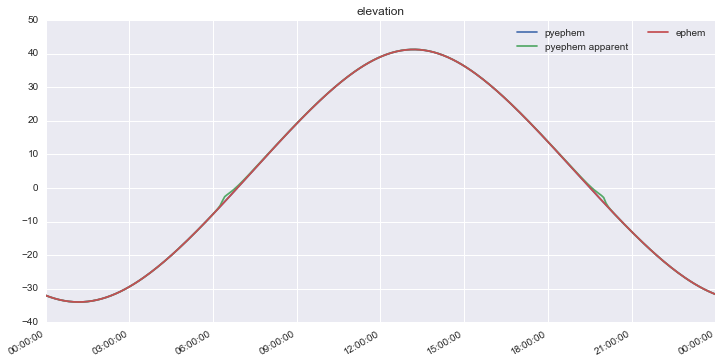

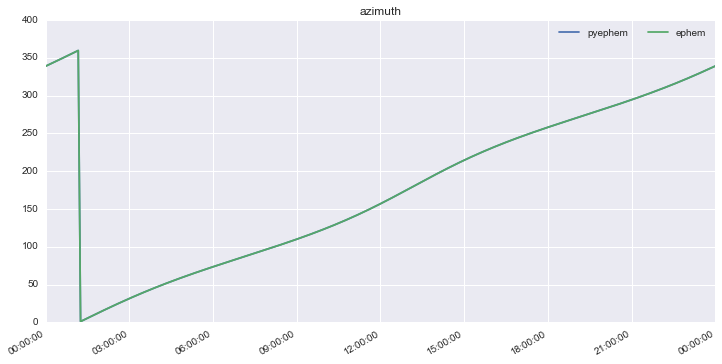

In [13]:
loc = berlin
times = pd.DatetimeIndex(start=datetime.date(2015,3,30), end=datetime.date(2015,3,31), freq='5min')

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('elevation')

plt.figure()
pyephemout['azimuth'].plot(label='pyephem')
ephemout['azimuth'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('azimuth')

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2015-06-28 00:00:00+02:00          -12.679250        343.659411 -12.679250   
2015-06-28 00:05:00+02:00          -12.885989        344.817210 -12.885989   
2015-06-28 00:10:00+02:00          -13.077872        345.978615 -13.077872   
2015-06-28 00:15:00+02:00          -13.254779        347.143381 -13.254779   
2015-06-28 00:20:00+02:00          -13.416591        348.311289 -13.416591   

                              azimuth  apparent_zenith      zenith  
2015-06-28 00:00:00+02:00  343.659411       102.679250  102.679250  
2015-06-28 00:05:00+02:00  344.817210       102.885989  102.885989  
2015-06-28 00:10:00+02:00  345.978615       103.077872  103.077872  
2015-06-28 00:15:00+02:00  347.143381       103.254779  103.254779  
2015-06-28 00:20:00+02:00  348.311289       103.416591  103.416591  
ephem
                           apparent_elevation  elevation     azimuth  \
2015-06-28 00:00:00+02:00      

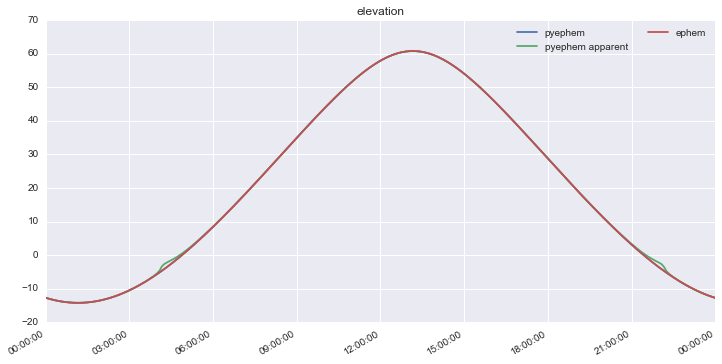

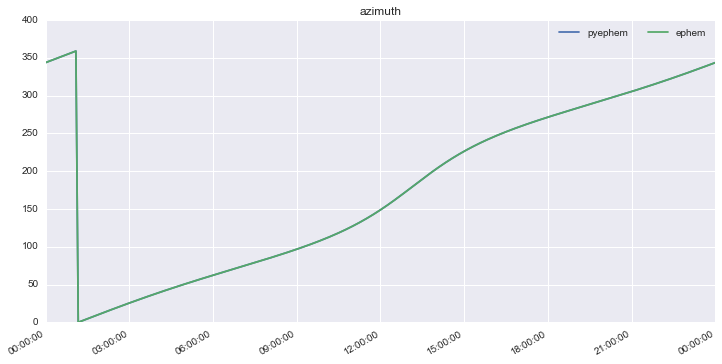

In [14]:
loc = berlin
times = pd.DatetimeIndex(start=datetime.date(2015,6,28), end=datetime.date(2015,6,29), freq='5min')

pyephemout = pvlib.solarposition.pyephem(times.tz_localize(loc.tz), loc.latitude, loc.longitude)
ephemout = pvlib.solarposition.ephemeris(times.tz_localize(loc.tz), loc.latitude, loc.longitude)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent')
ephemout['elevation'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('elevation')

plt.figure()
pyephemout['azimuth'].plot(label='pyephem')
ephemout['azimuth'].plot(label='ephem')
plt.legend(ncol=2)
plt.title('azimuth')

print('pyephem')
print(pyephemout.head())
print('ephem')
print(ephemout.head())

## Speed tests

In [15]:
times_loc = times.tz_localize(loc.tz)

In [16]:
%%timeit

pyephemout = pvlib.solarposition.pyephem(times_loc, loc.latitude, loc.longitude)
#ephemout = pvlib.solarposition.ephemeris(times, loc)

100 loops, best of 3: 12.3 ms per loop


In [17]:
%%timeit

#pyephemout = pvlib.solarposition.pyephem(times, loc)
ephemout = pvlib.solarposition.ephemeris(times_loc, loc.latitude, loc.longitude)

100 loops, best of 3: 12.8 ms per loop


In [18]:
%%timeit

#pyephemout = pvlib.solarposition.pyephem(times, loc)
ephemout = pvlib.solarposition.get_solarposition(times_loc, loc.latitude, loc.longitude,
                                                 method='nrel_numpy')

100 loops, best of 3: 7.73 ms per loop


This numba test will only work properly if you have installed numba. 

In [19]:
%%timeit

#pyephemout = pvlib.solarposition.pyephem(times, loc)
ephemout = pvlib.solarposition.get_solarposition(times_loc, loc.latitude, loc.longitude,
                                                 method='nrel_numba')

The slowest run took 2193.22 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 1.52 ms per loop


The numba calculation takes a long time the first time that it's run because it uses LLVM to compile the Python code to machine code. After that it's about 4-10 times faster depending on your machine. You can pass a ``numthreads`` argument to this function. The optimum ``numthreads`` depends on your machine and is equal to 4 by default.

In [20]:
%%timeit

#pyephemout = pvlib.solarposition.pyephem(times, loc)
ephemout = pvlib.solarposition.get_solarposition(times_loc, loc.latitude, loc.longitude,
                                                 method='nrel_numba', numthreads=16)

100 loops, best of 3: 2.22 ms per loop


In [21]:
%%timeit

ephemout = pvlib.solarposition.spa_python(times_loc, loc.latitude, loc.longitude,
                                          how='numba', numthreads=16)

100 loops, best of 3: 1.79 ms per loop
